In [2]:
import sklearn
import cv2
import pandas as pd
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os
import sys
from PIL import Image




import os

import numpy as np
from keras import backend as K
from keras.callbacks import ModelCheckpoint, CSVLogger
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.optimizers import Adam
from skimage.io import imsave

In [3]:
label=pd.read_csv('./image_label.csv')

In [4]:
sorted_label=label.sort_values('Image_name')


#label=label.to_numpy()

In [5]:
sorted_label

,Image_name,Plane
1274,Patient00168_Plane6_1_of_4,Fetal thorax
634,Patient00188_Plane5_1_of_1,Fetal femur
1127,Patient00216_Plane6_2_of_3,Fetal thorax
1461,Patient00305_Plane2_1_of_2,Fetal abdomen
290,Patient00305_Plane3_1_of_5,Fetal brain
...,...,...
1316,Patient01788_Plane2_1_of_1,Fetal abdomen
1604,Patient01789_Plane2_1_of_2,Fetal abdomen
1595,Patient01790_Plane2_1_of_1,Fetal abdomen
688,Patient01791_Plane5_1_of_1,Fetal femur


In [6]:
len(sorted_label.Plane.unique())

4

In [7]:
# using .get_dummies function to convert
# the categorical datatype to numerical 
# and storing the returned dataFrame
# in a new variable df1
df1 = pd.get_dummies(sorted_label['Plane'])
 
# using pd.concat to concatenate the dataframes 
# df and df1 and storing the concatenated 
# dataFrame in df.
label = pd.concat([sorted_label, df1], axis=1).reindex(sorted_label.index)
 
# removing the column 'Purchased' from df 
# as it is of no use now.
sorted_label.drop('Plane', axis=1, inplace=True)
 
# printing df
sorted_label

,Image_name
1274,Patient00168_Plane6_1_of_4
634,Patient00188_Plane5_1_of_1
1127,Patient00216_Plane6_2_of_3
1461,Patient00305_Plane2_1_of_2
290,Patient00305_Plane3_1_of_5
...,...
1316,Patient01788_Plane2_1_of_1
1604,Patient01789_Plane2_1_of_2
1595,Patient01790_Plane2_1_of_1
688,Patient01791_Plane5_1_of_1


In [8]:
label.shape

(1646, 6)

In [9]:
label

,Image_name,Plane,Fetal abdomen,Fetal brain,Fetal femur,Fetal thorax
1274,Patient00168_Plane6_1_of_4,Fetal thorax,False,False,False,True
634,Patient00188_Plane5_1_of_1,Fetal femur,False,False,True,False
1127,Patient00216_Plane6_2_of_3,Fetal thorax,False,False,False,True
1461,Patient00305_Plane2_1_of_2,Fetal abdomen,True,False,False,False
290,Patient00305_Plane3_1_of_5,Fetal brain,False,True,False,False
...,...,...,...,...,...,...
1316,Patient01788_Plane2_1_of_1,Fetal abdomen,True,False,False,False
1604,Patient01789_Plane2_1_of_2,Fetal abdomen,True,False,False,False
1595,Patient01790_Plane2_1_of_1,Fetal abdomen,True,False,False,False
688,Patient01791_Plane5_1_of_1,Fetal femur,False,False,True,False


In [10]:
labels=label.iloc[:,[2,3,4,5]]

In [11]:
labels

,Fetal abdomen,Fetal brain,Fetal femur,Fetal thorax
1274,False,False,False,True
634,False,False,True,False
1127,False,False,False,True
1461,True,False,False,False
290,False,True,False,False
...,...,...,...,...
1316,True,False,False,False
1604,True,False,False,False
1595,True,False,False,False
688,False,False,True,False


In [12]:
len(label)

1646

In [15]:
labels=labels*1

In [16]:
labels=labels.to_numpy()

In [16]:
type(labels)

numpy.ndarray

In [17]:
labels

array([[0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       ...,
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0]])

In [18]:
images = glob.glob("./images/*.png")


In [19]:
data_path='./images/'


def loading_data(data_path, target_size=(256,256)):
    img_arr_img = []
    filelist_img = glob.glob(data_path+"*.png")
    image_paths = sorted(filelist_img)
    
    for image_path in image_paths:
        try:
            image = cv2.imread(image_path)
            image = cv2.resize(image, dsize=target_size)
            cv2.normalize(image, image, 0, 255, cv2.NORM_MINMAX)
            img_arr_img.append(image)
        except (RuntimeError, TypeError,NameError) as e:
            print(e)
            pass
    return np.asarray(img_arr_img), image_paths 

In [20]:
image, image_path = loading_data(data_path)

In [21]:
import matplotlib.pyplot as plt

[0 0 0 1]


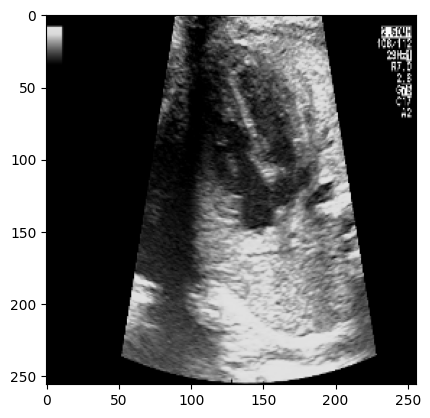

In [24]:
plt.imshow(image[0])
print(labels[0])
#print(image)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(image,labels, test_size=0.2, random_state = 42)

In [26]:
X_train.shape

(1316, 256, 256, 3)

In [27]:
X_test.shape

(330, 256, 256, 3)

In [28]:
y_train.shape

(1316, 4)

In [29]:
y_train=y_train*1

In [30]:
y_test.shape

(330, 4)

In [31]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten, Dense, Activation
from keras import optimizers
from keras.models import Sequential

In [32]:
model = Sequential()

model.add(Conv2D(32, 3, 3, padding='same', input_shape=(256,256,3), activation='relu'))
model.add(Conv2D(32, 3, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same', data_format='channels_last',strides=(1, 1)))

model.add(Conv2D(64, 3, 3, padding='same', activation='relu'))
model.add(Conv2D(64, 3, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same', data_format='channels_last',strides=(1, 1)))

model.add(Conv2D(128, 3, 3, padding='same', activation='relu'))
model.add(Conv2D(128, 3, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same', data_format='channels_last',strides=(1, 1)))

model.add(Conv2D(256, 3, 3, padding='same', activation='relu'))
model.add(Conv2D(256, 3, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same', data_format='channels_last',strides=(1, 1)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4))
model.add(Activation('sigmoid'))

In [33]:
model.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(lr=0.0001),
            metrics=['accuracy'])

c:\users\vcvis\appdata\local\programs\python\python38\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [34]:
history = model.fit(X_train, y_train, batch_size=64, verbose=1 ,epochs=50)

Epoch 1/50
21/21 [==============================] - 12s 31ms/step - loss: 0.6128 - accuracy: 0.2599
Epoch 2/50
21/21 [==============================] - 1s 25ms/step - loss: 0.5744 - accuracy: 0.2994
Epoch 3/50
21/21 [==============================] - 1s 25ms/step - loss: 0.5481 - accuracy: 0.3830
Epoch 4/50
21/21 [==============================] - 0s 22ms/step - loss: 0.5263 - accuracy: 0.4309
Epoch 5/50
21/21 [==============================] - 0s 23ms/step - loss: 0.5002 - accuracy: 0.5175
Epoch 6/50
21/21 [==============================] - 1s 24ms/step - loss: 0.4751 - accuracy: 0.5578
Epoch 7/50
21/21 [==============================] - 0s 23ms/step - loss: 0.4513 - accuracy: 0.5897
Epoch 8/50
21/21 [==============================] - 1s 27ms/step - loss: 0.4113 - accuracy: 0.6459
Epoch 9/50
21/21 [==============================] - 0s 23ms/step - loss: 0.3974 - accuracy: 0.6527
Epoch 10/50
21/21 [==============================] - 1s 25ms/step - loss: 0.3698 - accuracy: 0.6786
Epoch 11

In [35]:
pred=model.predict(X_test)

11/11 [==============================] - 1s 10ms/step


In [36]:
pred=np.argmax(pred,axis=1)

In [37]:
y_test=np.argmax(y_test,axis=1)

In [38]:
y_test

array([3, 1, 1, 3, 2, 1, 0, 1, 0, 1, 2, 1, 1, 1, 3, 1, 3, 1, 0, 1, 0, 0,
       1, 3, 0, 0, 3, 3, 1, 2, 3, 3, 1, 0, 3, 1, 0, 1, 3, 2, 3, 2, 1, 1,
       3, 0, 1, 1, 1, 1, 1, 3, 0, 3, 0, 3, 1, 1, 1, 0, 2, 3, 2, 2, 3, 1,
       2, 1, 1, 1, 3, 3, 2, 2, 3, 3, 1, 2, 0, 2, 1, 1, 3, 2, 3, 1, 0, 1,
       2, 1, 0, 1, 2, 3, 1, 3, 0, 1, 1, 0, 3, 2, 3, 0, 3, 1, 3, 1, 3, 1,
       1, 2, 0, 1, 1, 3, 3, 2, 2, 3, 0, 2, 1, 3, 2, 0, 3, 3, 0, 1, 1, 1,
       1, 2, 3, 0, 3, 3, 2, 1, 2, 1, 3, 3, 3, 2, 0, 0, 3, 1, 0, 1, 1, 0,
       3, 1, 3, 3, 0, 3, 0, 3, 2, 1, 3, 2, 2, 2, 3, 3, 3, 1, 3, 1, 1, 3,
       0, 0, 1, 3, 0, 1, 3, 0, 0, 1, 2, 1, 3, 3, 3, 3, 1, 0, 3, 3, 2, 1,
       0, 0, 1, 0, 2, 1, 1, 1, 3, 2, 1, 3, 1, 3, 0, 0, 3, 1, 3, 1, 1, 1,
       3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 2, 2, 2, 2, 3, 3, 2, 3, 0, 2,
       0, 0, 2, 0, 0, 0, 3, 0, 1, 3, 3, 0, 1, 1, 1, 3, 2, 1, 0, 3, 3, 1,
       3, 1, 2, 1, 0, 1, 3, 0, 0, 1, 1, 2, 1, 3, 3, 1, 3, 2, 1, 1, 1, 1,
       1, 1, 0, 2, 1, 3, 3, 3, 1, 1, 3, 3, 2, 0, 0,

In [39]:
pred

array([3, 1, 2, 3, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1, 3, 1, 2, 1, 0, 1, 0, 0,
       1, 3, 0, 0, 3, 3, 1, 2, 3, 3, 1, 0, 1, 1, 1, 2, 0, 2, 3, 2, 1, 1,
       3, 0, 2, 1, 1, 1, 1, 3, 0, 3, 3, 2, 1, 1, 1, 1, 2, 3, 2, 2, 3, 1,
       2, 1, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 0, 2, 1, 1, 0, 2, 3, 2, 3, 1,
       2, 1, 0, 3, 2, 3, 1, 0, 1, 1, 1, 0, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1,
       1, 2, 2, 1, 1, 3, 3, 0, 2, 3, 1, 2, 1, 0, 2, 1, 3, 3, 2, 1, 2, 1,
       0, 2, 3, 0, 3, 3, 2, 1, 2, 2, 3, 3, 3, 0, 0, 0, 3, 1, 0, 1, 1, 3,
       3, 2, 3, 3, 0, 0, 0, 3, 2, 1, 3, 2, 2, 2, 3, 3, 3, 1, 3, 2, 1, 3,
       2, 3, 1, 3, 0, 1, 3, 2, 0, 2, 2, 1, 3, 3, 3, 3, 1, 0, 3, 3, 2, 1,
       1, 3, 2, 2, 2, 1, 1, 1, 3, 2, 1, 3, 1, 3, 0, 3, 3, 1, 3, 1, 1, 1,
       0, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 2, 2, 2, 2, 3, 3, 2, 3, 0, 2,
       0, 0, 0, 0, 0, 0, 3, 2, 1, 3, 3, 0, 2, 1, 2, 3, 2, 1, 0, 3, 0, 1,
       3, 1, 2, 1, 0, 1, 3, 0, 0, 1, 1, 3, 1, 3, 0, 1, 3, 2, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 3, 3, 3, 1, 1, 3, 3, 1, 0, 0,

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
cm=confusion_matrix(y_test,pred)

In [42]:
cm

array([[40,  9,  9,  7],
       [ 1, 99, 14,  1],
       [ 3,  2, 45,  1],
       [ 8,  1,  3, 87]], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_test,pred)

0.8212121212121212

In [45]:
test_path='./External Test images/'

In [46]:
images,image_path=loading_data(test_path)

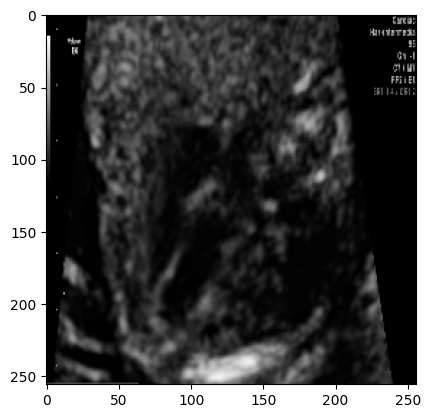

In [47]:
plt.imshow(images[0])

In [48]:
type(images)

numpy.ndarray

In [49]:
predition_test=model.predict(images)

2/2 [==============================] - 1s 470ms/step


In [48]:
predss=np.argmax(predition_test,axis=1)

In [49]:
predss

array([3, 1, 1, 3, 2, 0, 3, 1, 2, 1, 1, 2, 3, 1, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 0, 2, 1, 3, 1, 1, 0, 1, 3, 1, 3, 1, 1, 2, 2, 1, 3])